In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
%matplotlib inline
from sklearn import metrics

11340.0

In [2]:
customer_data = pd.read_csv('BlackFriday.csv')

In [3]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


# Checking for Null Values

In [4]:
cat_2 = customer_data['Product_Category_2'].value_counts().sum()
cat_2

370591

In [5]:
(len(customer_data) - cat_2)/len(customer_data)*100

31.06271287648095

In [6]:
cat_3 = customer_data['Product_Category_3'].value_counts().sum()

In [7]:
(len(customer_data) - cat_3)/len(customer_data)*100

69.44102891306734

#### Dropping Null Columns as they have more than 5% missing values.

In [112]:
customer_data = customer_data.drop(columns=['Product_Category_2', 'Product_Category_3'], axis=1)

### Creating a Primary-Key based on 'User_ID' and 'Product_ID'

In [9]:
customer_data.User_ID.nunique()

5891

In [10]:
customer_data.Product_ID.nunique()

3623

In [69]:
user = customer_data['User_ID'].astype('str') 

In [70]:
product = customer_data['Product_ID'].astype('str')

In [13]:
customer_data['Unique_ID'] = user +' ' + product

In [71]:
# Dropping 'User_ID' and 'Product_ID' columns

customer_data = customer_data.drop(columns=['User_ID', 'Product_ID'], axis=1)

In [72]:
customer_data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,F,0-17,10,A,2,0,3,8370
1,F,0-17,10,A,2,0,1,15200
2,F,0-17,10,A,2,0,12,1422
3,F,0-17,10,A,2,0,12,1057
4,M,55+,16,C,4+,0,8,7969


In [73]:
customer_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Occupation,537577.0,8.082710,6.524120,0.0,2.0,7.0,14.0,20.0
Marital_Status,537577.0,0.408797,0.491612,0.0,0.0,0.0,1.0,1.0
Product_Category_1,537577.0,5.295546,3.750701,1.0,1.0,5.0,8.0,18.0
Purchase,537577.0,9333.859853,4981.022133,185.0,5866.0,8062.0,12073.0,23961.0


#### Finding the range of Purchase

In [17]:
print(customer_data.Purchase.quantile(q=0.25))
print(customer_data.Purchase.quantile(q=0.5))
print(customer_data.Purchase.quantile(q=0.75))

5866.0
8062.0
12073.0


In [18]:
customer_data.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Purchase', 'Unique_ID'],
      dtype='object')

In [74]:
del customer_data

### Re Enter the data

In [75]:
customer_data = pd.read_csv('Customer_Data.csv')

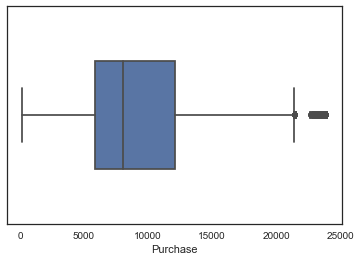

In [21]:
sns.boxplot(x = customer_data['Purchase'], width=0.5)

- Outliers exist in the Purchase Column

In [22]:
#### Outliers

customer_data.describe().T

q3 = np.quantile(a=customer_data.Purchase, q=0.75)
q1 = np.quantile(a=customer_data.Purchase, q=0.25)
iqr = q3 - q1
1.5*iqr

print('No of Outliers:',len(customer_data['Purchase'][customer_data['Purchase'] > (q3 + (1.5*iqr))]))

No of Outliers: 2665


## Purchase Distribution

C:\Users\IQbal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\IQbal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


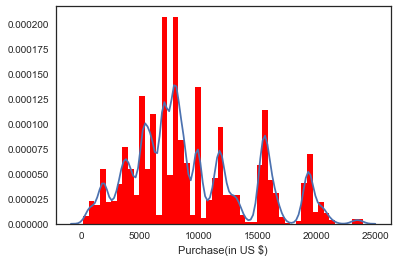

In [12]:
sns.distplot(customer_data['Purchase'], axlabel="Purchase(in US $)", hist_kws={"linewidth": 3,"alpha": 1, "color": "r"})

In [24]:
skewness = (3*(customer_data['Purchase'].mean() - customer_data['Purchase'].median()))/(customer_data['Purchase'].std())

In [25]:
skewness

## Since skewness is positive, Hence right skewed.

0.7660234097113452

In [26]:
customer_data['sqrt'] = np.sqrt(customer_data['Purchase'])

In [27]:
customer_data['invSqrt'] = 1/ (np.sqrt(customer_data['Purchase']))

In [17]:
customer_data['log'] = np.log(customer_data['Purchase'])

In [29]:
skew_sqrt = (3*(customer_data['sqrt'].mean() - customer_data['sqrt'].median()))/(customer_data['sqrt'].std())

In [30]:
skew_inv = (3*(customer_data['invSqrt'].mean() - customer_data['invSqrt'].median()))/(customer_data['invSqrt'].std())

In [31]:
skew_log = (3*(customer_data['log'].mean() - customer_data['log'].median()))/(customer_data['log'].std())

In [32]:
print(skew_sqrt,'\n',skew_inv,'\n', skew_log)

0.35657075653136916 
 0.5030804714946393 
 -0.11491516838990029


In [13]:
from scipy import stats

In [14]:
xx = customer_data['Purchase']

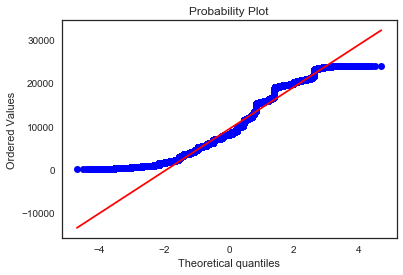

In [15]:
res_pur = stats.probplot(x=xx, plot=plt)

In [34]:
x1 = customer_data['sqrt']

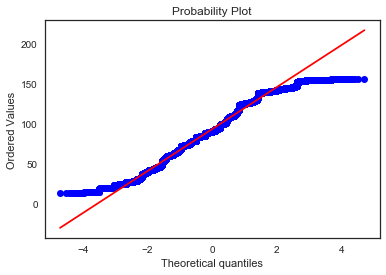

In [35]:
res = stats.probplot(x=x1, plot= plt)

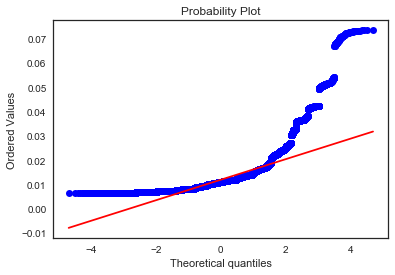

In [36]:
x2 = customer_data['invSqrt']

res2 = stats.probplot(x=x2, plot=plt)

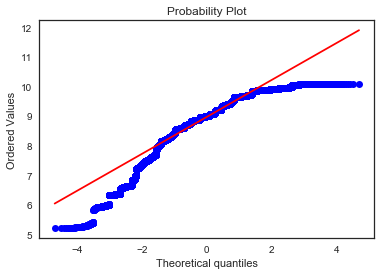

In [18]:
x3 = customer_data['log'] 

res3 = stats.probplot(x=x3, plot=plt)

C:\Users\IQbal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\IQbal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


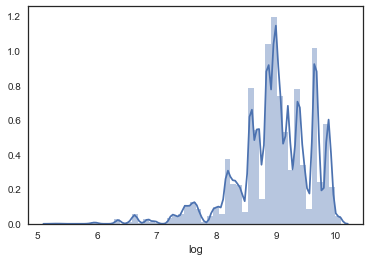

In [19]:
sns.distplot(x3)

#### Observation:
- The 'sqrt' transformation seems to be the best.

# Feature Engineering

In [113]:
customer_data_copy = customer_data.copy()

In [114]:
customer_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Purchase                      537577 non-null int64
dtypes: int64(5), object(5)
memory usage: 41.0+ MB


In [79]:
customer_data_copy = customer_data_copy.drop(columns=['Unnamed: 0'], axis=1)

### Data Transformation

In [80]:
customer_data_copy.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Purchase', 'Unique_ID'],
      dtype='object')

In [81]:
customer_data_copy = customer_data_copy.drop(columns=['Unique_ID'], axis=1)

In [82]:
customer_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 8 columns):
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Purchase                      537577 non-null int64
dtypes: int64(4), object(4)
memory usage: 32.8+ MB


In [115]:
### Converting Occupation to object

customer_data_copy['Occupation'] = customer_data_copy['Occupation'].astype('object', copy = False)

In [116]:
## Converting Product_Category_1 to object

customer_data_copy['Product_Category_1'] = customer_data_copy['Product_Category_1'].astype('object', copy = False)

In [ ]:
customer_data_copy.Marital_Status.value_counts()

In [85]:
## Converting Marital Status to Categorical

customer_data_copy['Marital_Status'] = customer_data_copy['Marital_Status'].map({0 : 'UnMarried', 1: 'Married'})

In [86]:
customer_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 8 columns):
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null object
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null object
Product_Category_1            537577 non-null object
Purchase                      537577 non-null int64
dtypes: int64(1), object(7)
memory usage: 32.8+ MB


#### AGE #####

In [ ]:
customer_data_copy.Age.value_counts()

#### Stay

**Encoding Ordinal Categorical Features**

In [87]:
customer_data_copy['Stay_In_Current_City_Years'] = customer_data_copy['Stay_In_Current_City_Years'].map({'0': 1, '1':2,'2':3, '3':4, '4+':5})

In [88]:
customer_data_copy.Stay_In_Current_City_Years.value_counts()

2    189192
3     99459
4     93312
5     82889
1     72725
Name: Stay_In_Current_City_Years, dtype: int64

## Initial Occupation and Product Category Plot

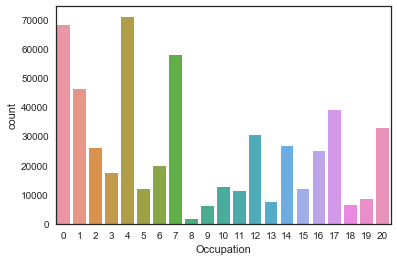

In [117]:
sns.countplot(customer_data_copy.Occupation)

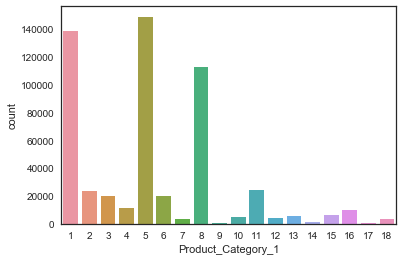

In [118]:
sns.countplot(customer_data_copy.Product_Category_1)

## Occupation

In [130]:
customer_data_copy.NewProducts.nunique()

6

In [46]:
occupation_vals = [4,0,7,1,17,20,12,14,2,16,6]

In [47]:
others = [3,10,5,15,11,19,13,18,9,8]

In [119]:
customer_data_copy['NewOccupation'] = customer_data['Occupation']

In [120]:
customer_data_copy.loc[customer_data['Occupation'] == 3, ['NewOccupation'] ] = 'Others'
customer_data_copy.loc[customer_data['Occupation'] == 10, ['NewOccupation'] ] = 'Others'
customer_data_copy.loc[customer_data['Occupation'] == 5, ['NewOccupation'] ] = 'Others'
customer_data_copy.loc[customer_data['Occupation'] == 15, ['NewOccupation'] ] = 'Others'
customer_data_copy.loc[customer_data['Occupation'] == 11, ['NewOccupation'] ] = 'Others'
customer_data_copy.loc[customer_data['Occupation'] == 19, ['NewOccupation'] ] = 'Others'
customer_data_copy.loc[customer_data['Occupation'] == 13, ['NewOccupation'] ] = 'Others'
customer_data_copy.loc[customer_data['Occupation'] == 18, ['NewOccupation'] ] = 'Others'
customer_data_copy.loc[customer_data['Occupation'] == 9, ['NewOccupation'] ] = 'Others'
customer_data_copy.loc[customer_data['Occupation'] == 8, ['NewOccupation'] ] = 'Others'

In [91]:
customer_data_copy['NewOccupation'].value_counts()

Others    95226
4         70862
0         68120
7         57806
1         45971
17        39090
20        32910
12        30423
14        26712
2         25845
16        24790
6         19822
Name: NewOccupation, dtype: int64

## Products

In [121]:
customer_data_copy['Product_Category_1'] = customer_data_copy['Product_Category_1'].astype('object', copy=False)

In [122]:
customer_data_copy['NewProducts'] = customer_data_copy['Product_Category_1']

In [94]:
customer_data_copy.Product_Category_1.unique()

array([3, 1, 12, 8, 5, 4, 2, 6, 14, 11, 13, 15, 7, 16, 18, 10, 17, 9],
      dtype=object)

In [123]:
customer_data_copy.loc[ customer_data_copy['Product_Category_1'] == 6, ['NewProducts']] = 'OtherProd'
customer_data_copy.loc[ customer_data_copy['Product_Category_1'] == 3, ['NewProducts']] = 'OtherProd'
customer_data_copy.loc[ customer_data_copy['Product_Category_1'] == 4, ['NewProducts']] = 'OtherProd'
customer_data_copy.loc[ customer_data_copy['Product_Category_1'] == 16, ['NewProducts']] = 'OtherProd'
customer_data_copy.loc[ customer_data_copy['Product_Category_1'] == 15, ['NewProducts']] = 'OtherProd'
customer_data_copy.loc[ customer_data_copy['Product_Category_1'] == 13, ['NewProducts']] = 'OtherProd'
customer_data_copy.loc[ customer_data_copy['Product_Category_1'] == 10, ['NewProducts']] = 'OtherProd'
customer_data_copy.loc[ customer_data_copy['Product_Category_1'] == 12, ['NewProducts']] = 'OtherProd'
customer_data_copy.loc[ customer_data_copy['Product_Category_1'] == 7, ['NewProducts']] = 'OtherProd'
customer_data_copy.loc[ customer_data_copy['Product_Category_1'] == 18, ['NewProducts']] = 'OtherProd'
customer_data_copy.loc[ customer_data_copy['Product_Category_1'] == 14, ['NewProducts']] = 'OtherProd'
customer_data_copy.loc[ customer_data_copy['Product_Category_1'] == 17, ['NewProducts']] = 'OtherProd'
customer_data_copy.loc[ customer_data_copy['Product_Category_1'] == 9, ['NewProducts']] = 'OtherProd'

In [96]:
customer_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null object
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null int64
Marital_Status                537577 non-null object
Product_Category_1            537577 non-null object
Purchase                      537577 non-null int64
NewOccupation                 537577 non-null object
NewProducts                   537577 non-null object
dtypes: int64(2), object(8)
memory usage: 41.0+ MB


# ## Post Binning Occupation and Product Category Plot

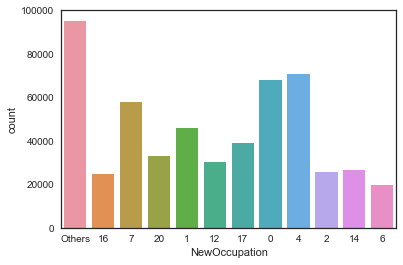

In [124]:
sns.countplot(customer_data_copy.NewOccupation)

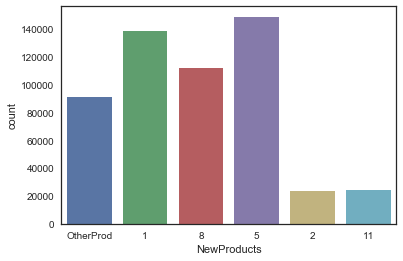

In [125]:
sns.countplot(customer_data_copy.NewProducts)

## Polychotomization

In [97]:
customer_data_copy = customer_data_copy.drop(columns=['Occupation', 'Product_Category_1', 'Purchase'], axis=1)

In [98]:
customer_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 7 columns):
Gender                        537577 non-null object
Age                           537577 non-null object
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null int64
Marital_Status                537577 non-null object
NewOccupation                 537577 non-null object
NewProducts                   537577 non-null object
dtypes: int64(1), object(6)
memory usage: 28.7+ MB


In [100]:
x_feature = list(customer_data_copy.columns)
#x_feature.remove('sqrt')
x_feature

['Gender',
 'Age',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'NewOccupation',
 'NewProducts']

In [101]:
data_1 = pd.get_dummies(customer_data_copy[x_feature], drop_first=True)

In [102]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

In [103]:
x = data_1.copy()
y = customer_data['Purchase'].copy()

In [104]:
## Adjusted R^2
def AdjRsquare(model, x, y):
    Rsquare = model.score(x, y)
    NoData = len(y)
    p = x.shape[1]
    tempRsquare = 1 - (1-Rsquare)*(NoData - 1
                                  )/(NoData - p - 1)
    return tempRsquare

In [105]:
## Combine all the steps to test the model performance
def linRegcheckModelPerformance(x, y):
    model = LinearRegression()
    # Covert data into train and test
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state = 666, shuffle= True)
    # Build model with train data set
    model.fit(x_train, y_train)
    # Train accuracies
    trainR2 = model.score(x_train, y_train)
    predictedPurchaseTrain= model.predict(x_train)
    TrainMse = metrics.mean_squared_error(y_train, predictedPurchaseTrain)
    trainRmse = np.sqrt(TrainMse)
    trainRmsePct = trainRmse/np.mean(np.mean(np.array(y_train)))*100
    trainAdjR2 = AdjRsquare(model, x_train, y_train)
    trainAccuracies = [trainRmse, trainRmsePct, trainR2, trainAdjR2]
    # Test accuracies
    testR2 = model.score(x_test, y_test)
    predictedPurchaseTest = model.predict(x_test)
    TestMse = metrics.mean_squared_error( y_test, predictedPurchaseTest)
    testRmse = np.sqrt(TestMse)
    testRmsePct = testRmse/np.mean(np.mean(np.array(y_test)))*100
    testAdjR2 = AdjRsquare(model, x_test, y_test)
    testAccuracies = [testRmse, testRmsePct, testR2, testAdjR2]
    # Create dataframe for results
    resultsDf = pd.DataFrame(index = ["rmse", "rmsePct", "r2", "adjR2"])
    resultsDf['trainAccuracy'] = trainAccuracies
    resultsDf['testAccuracy'] = testAccuracies
    return ( round(resultsDf, 2))

In [108]:
linRegcheckModelPerformance(x,y)

,trainAccuracy,testAccuracy
rmse,3888.17,3895.55
rmsePct,41.68,41.68
r2,0.39,0.39
adjR2,0.39,0.39
